In [50]:
import sys
sys.path.append('D:/v1ktop/Drive-INAOE/Code/data_aumentation_for_author_profiling/')

In [51]:
#from google.colab import drive
#drive.mount('/content/drive/')

In [52]:
#import sys
#sys.path.append('/content/drive/My Drive/Code/data_aumentation_for_author_profiling/')

In [53]:
from word_level_da.preprocessing.load_data import Dataset

In [54]:
 %load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
 %autoreload 2

In [56]:
! pip install multidict

## Explore data

In [57]:
from word_level_da.classifier.explore_data import explore_data
from word_level_da.classifier.feature_extraction import FeatureExtraction
from word_level_da.classifier.svm_text import Svm_Text

## Clave del conjunto de datos

In [58]:
key="depresion18_local"

In [59]:
data_cls=Dataset(key=key, remove_end=True, chunking=True, doc_len=64, min_len=32)

In [60]:
all_training= data_cls.get_dataset(folder_name="prep_chunks_joined", truth_name="train_golden_truth_joined.txt",
                              partition="training")

In [61]:
exp_cls=explore_data(all_training[0], all_training[1], "D:/", plot_format="png")

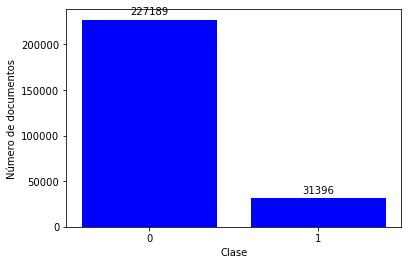

In [62]:
exp_cls.plot_class_distribution()

## Palabras con puntuacion Xi2 < 0.001 (Conjunto original)

In [63]:
 %autoreload 2

In [64]:
p_confidence=0.001
save_words=False
K=None

In [65]:
obj_dir = r"D:\v1ktop\Drive-INAOE\Code\data_aumentation_for_author_profiling\word_level_da\obj"

In [66]:
ft1 = FeatureExtraction(all_training[0], stop_wors=None, use_idf=True)
top_s = top_words_selected = ft1.get_chi_2(all_training[1], k=K, return_scores=True)

In [69]:
from sklearn.feature_selection import chi2

In [70]:
 score, pval = chi2(ft1.X_vec, all_training[1])

In [85]:
res=dict(zip(ft1.cv.get_feature_names(), zip(score,pval)))

In [88]:
values = pd.DataFrame(res).T

In [105]:
values.rename(index=str, columns={0: 'score', 1:'pval'}, inplace=True)
values['score'] = values['score'].round(6)
values['pval'] = values['pval'].round(8)

In [106]:
values

,score,pval
0004,0.036386,0.848721
002,0.032000,0.858028
010,0.029743,0.863074
021,0.063928,0.800392
026,0.031965,0.858106
...,...,...
zzzzz,0.075729,0.783172
zzzzzzz,0.080835,0.776169
zzzzzzzz,0.144976,0.703383
zzzzzzzzzzzzzzzzzzzz,0.039806,0.841860


In [77]:
res.keys()

dict_keys(['0004', '002'])

In [40]:
import pandas as pd

In [41]:
values=pd.DataFrame(mydic).T

In [42]:
values

,0,1
hello,25.0,0.045


In [ ]:
all_scores=[]

In [ ]:
methods=["Xi", "Thesaurus", "Context_1", "Rel_0", "Rel_1"]

In [ ]:
for method in methods:
    tops_with_score=[]
    for i in range (1,11):
        prefix = method + str(i)
        folder = method + "/" + prefix
        truth_file = method + "/" + prefix + ".txt"
        docs, l_docs, ids, useless_data = data_cls.get_dataset(folder_name=folder, truth_name=truth_file,
                                                           partition="augmented")

        new_training = np.append(all_training[0], docs)
        new_labels = np.append(all_training[1], l_docs)

        ft1 = FeatureExtraction(new_training, stop_wors=None, use_idf=True)
        top_sm = ft1.get_chi_2(new_labels, k=K, return_scores=True)

        tops_with_score.append(top_sm)
    all_scores.append(tops_with_score)

In [ ]:
len(all_scores)

5

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
len(all_scores[0])

10

In [ ]:
ys=[]

In [ ]:
for i in range(5):
    y=[len(set(x[0:1000].index)-set(top_s[0:1000].index)) for x in all_scores[i]]
    ys.append(y)

In [ ]:
ys

[[157, 227, 266, 304, 340, 368, 382, 393, 402, 417],
 [151, 212, 246, 282, 313, 340, 361, 379, 397, 409],
 [157, 232, 273, 306, 338, 365, 383, 393, 402, 420],
 [354, 463, 495, 543, 571, 604, 623, 633, 649, 665],
 [187, 260, 299, 340, 369, 386, 407, 426, 442, 461]]

In [ ]:
x=[i for i in range (1,11)]

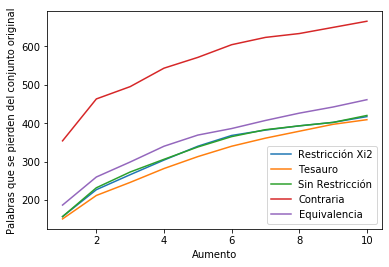

In [ ]:
beingsaved = plt.figure()
plt.xlabel('Aumento')
plt.ylabel('Palabras que se pierden del conjunto original')

for y in (ys):
    plt.plot(x,y)
    
plt.legend(["Restricción Xi2", "Tesauro", "Sin Restricción","Contraria", "Equivalencia",])
beingsaved.savefig("all_methods_chi", format="png")

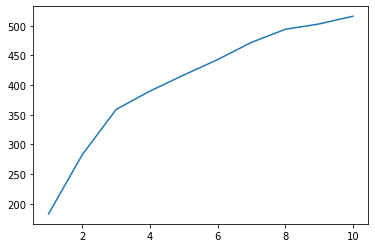

## Analisis cualitativo

In [ ]:
1

1

In [ ]:
ft = FeatureExtraction(all_training[0], stop_wors=None, use_idf=True)

In [ ]:
top_words_selected = ft.get_chi_2(all_training[1], k=100, return_scores=True)

In [ ]:
exp_aug=explore_data(plot_dir="D:/", plot_format=".png")

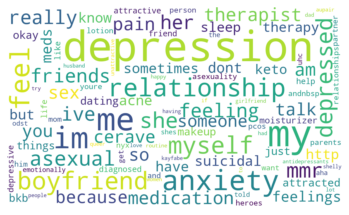

In [ ]:
exp_aug.generate_word_cloud(top_words_selected,max_words=100)

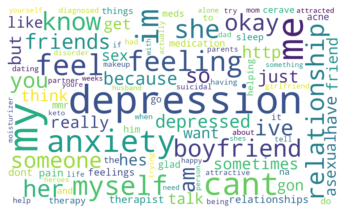

In [ ]:
exp_aug.generate_word_cloud(tops_with_score[0],max_words=100)

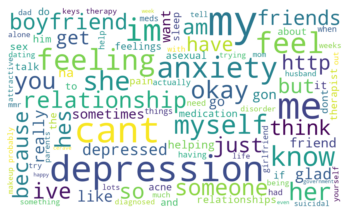

In [ ]:
exp_aug.generate_word_cloud(tops_with_score[1],max_words=100)

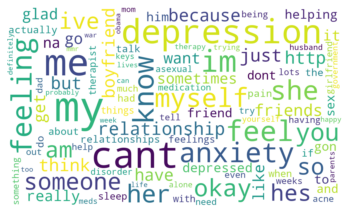

In [ ]:
exp_aug.generate_word_cloud(tops_with_score[2],max_words=100)

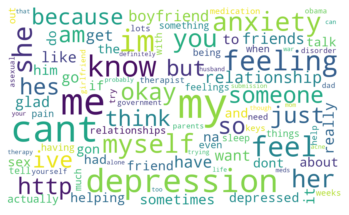

In [ ]:
exp_aug.generate_word_cloud(tops_with_score[3],max_words=100)

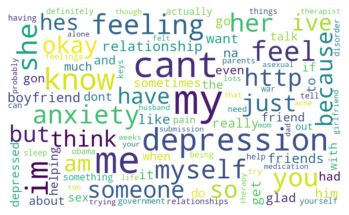

In [ ]:
exp_aug.generate_word_cloud(tops_with_score[4],max_words=100)

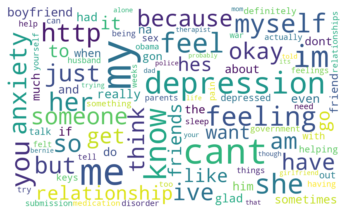

In [ ]:
exp_aug.generate_word_cloud(tops_with_score[5],max_words=100)

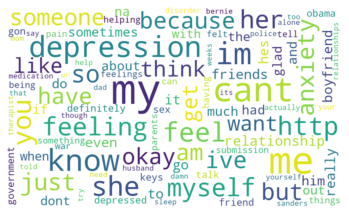

In [ ]:
exp_aug.generate_word_cloud(tops_with_score[6],max_words=100)

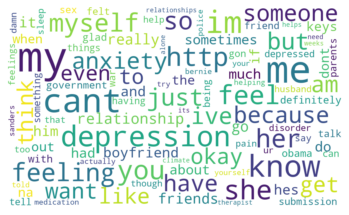

In [ ]:
exp_aug.generate_word_cloud(tops_with_score[7],max_words=100)

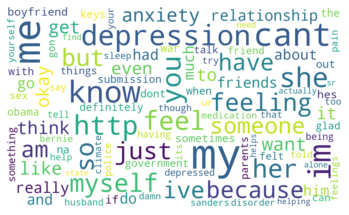

In [ ]:
exp_aug.generate_word_cloud(tops_with_score[8],max_words=100)

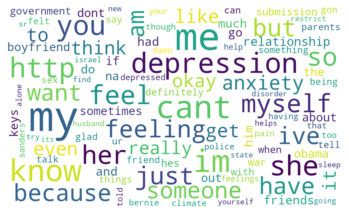

In [ ]:
exp_aug.generate_word_cloud(tops_with_score[9],max_words=100)

In [ ]:
tops_with_score[6]

,score
my,2121.747809
me,1691.937785
cant,1376.370034
im,1090.531856
know,1069.184540
...,...
therapist,225.439011
its,219.386270
dad,219.216159
damn,216.390826


In [ ]:
tops_with_score[0]

,score
my,1056.798956
depression,922.321441
me,810.551685
cant,590.418001
im,562.491719
...,...
shes,98.609970
youre,98.553569
moisturizer,97.889284
heroes,96.981405


In [ ]:
set(tops_by_n[1])-set(tops_by_n[0])

{'abusive',
 'advice',
 'angry',
 'attracted',
 'attraction',
 'attractive',
 'aupair',
 'china',
 'com',
 'cpap',
 'dealing',
 'dysthymia',
 'eblade',
 'economic',
 'eds',
 'election',
 'family',
 'gun',
 'guys',
 'india',
 'industry',
 'learnt',
 'lexapro',
 'libido',
 'moisturize',
 'moisturizer',
 'moisturizing',
 'mom',
 'month',
 'months',
 'mood',
 'moods',
 'motivation',
 'movie',
 'offlane',
 'parents',
 'partner',
 'partners',
 'paul',
 'pcos',
 'people',
 'person',
 'personality',
 'physically',
 'physicians',
 'pill',
 'pills',
 'pimples',
 'romantic',
 'roms',
 'rosh',
 'routine',
 'sadness',
 'since',
 'sister',
 'sleep',
 'sleeping',
 'stress',
 'stressed',
 'stridex',
 'study',
 'them',
 'then',
 'therapies',
 'therapist',
 'therapists',
 'therapy',
 'thing',
 'things',
 'think',
 'thinking',
 'uhc',
 'users',
 'wanting',
 'woman',
 'women',
 'world',
 'worried',
 'worse',
 'would',
 'wrestlers'}

In [ ]:
'women' in set(tops_by_n[0])

False

In [ ]:
tops_by_n[0]

{'depressive': True,
 'willakers': True,
 'try': True,
 'skadi': True,
 'usually': True,
 'hope': True,
 'or': True,
 'xanax': True,
 'gyno': True,
 'anything': True,
 'ive': True,
 'dota': True,
 'dotabuff': True,
 'anymore': True,
 'aokp': True,
 'dating': True,
 'anxiety': True,
 'exhausting': True,
 'it': True,
 'friend': True,
 'friends': True,
 'istick': True,
 'situation': True,
 'cant': True,
 'friendship': True,
 'israel': True,
 'lesbian': True,
 'lesbians': True,
 'rhys': True,
 'anxious': True,
 'can': True,
 'aosp': True,
 'had': True,
 'my': True,
 'want': True,
 'wanted': True,
 'appointment': True,
 'caliper': True,
 'the': True,
 'lately': True,
 'boyfriends': True,
 'boyfriend': True,
 'thayers': True,
 'acne': True,
 'war': True,
 'hair': True,
 'skincare': True,
 'that': True,
 'calvin': True,
 'skin': True,
 'thanks': True,
 'thank': True,
 'mum': True,
 'school': True,
 'you': True,
 'science': True,
 'haha': True,
 'much': True,
 'apnea': True,
 'aghs': True,
 'h